
Environment Setup

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from pathlib import Path

In [13]:
# Plot settings

sns.set(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (12,6)

In [53]:
# Load data

data_path = Path("../data/final/ibm_df.csv")
df = pd.read_csv(data_path, parse_dates=["Date"])
print(df.head(2))

        Date       Close   Volume    Return  Interest  Sentiment
0 2020-11-25  118.738052  4326151 -0.001768 -0.195876     0.0000
1 2020-11-27  118.881454  2187395  0.001208 -0.505155     0.4588



EDA

In [54]:
# Shape

rows, cols = df.shape
print(f"Dataset Shape: Rows={rows:,}, Columns={cols}")

Dataset Shape: Rows=362, Columns=6


In [55]:
# Columns

print(df.columns.tolist())

['Date', 'Close', 'Volume', 'Return', 'Interest', 'Sentiment']


In [56]:
# Missing Values (should all be 0)

print("\nMissing values:\n", df.isna().sum())


Missing values:
 Date         0
Close        0
Volume       0
Return       0
Interest     0
Sentiment    0
dtype: int64


In [57]:
# Summary Stats

print(df.describe())

                                Date       Close        Volume      Return  \
count                            362  362.000000  3.620000e+02  362.000000   
mean   2023-02-19 01:15:34.806629888  160.446153  5.270017e+06    0.001272   
min              2020-11-25 00:00:00  113.393883  1.790400e+06   -0.099050   
25%              2021-11-03 06:00:00  128.217503  3.436975e+06   -0.006216   
50%              2023-02-25 00:00:00  137.530632  4.453030e+06    0.001419   
75%              2024-04-24 18:00:00  172.919998  5.713075e+06    0.008631   
max              2025-11-20 00:00:00  312.570007  3.981442e+07    0.129642   
std                              NaN   49.634107  3.577895e+06    0.017225   

         Interest   Sentiment  
count  362.000000  362.000000  
mean    -0.030871    0.032755  
min     -0.938144   -0.862500  
25%     -0.175258    0.000000  
50%     -0.072165    0.000000  
75%      0.175258    0.158833  
max      1.000000    0.822500  
std      0.400205    0.275264  


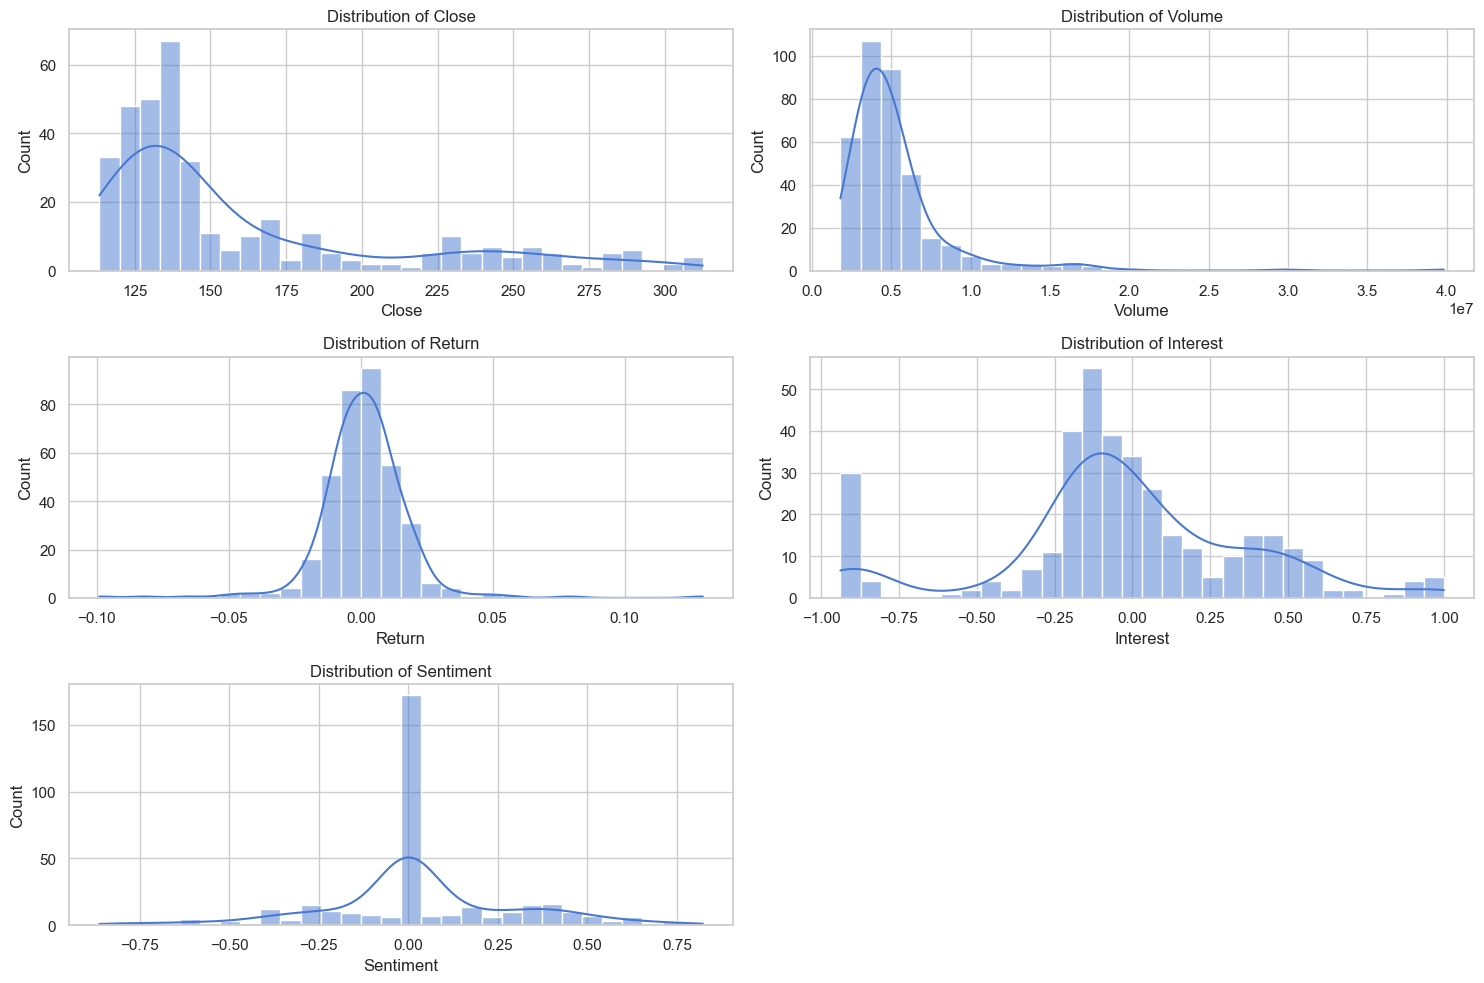

In [58]:
# Distributions of variables 

variables = ['Close', 'Volume', 'Return', 'Interest', 'Sentiment']

plt.figure(figsize=(15,10))
for i, var in enumerate(variables, 1):
    plt.subplot(3,2,i)
    sns.histplot(df[var], kde=True, bins=30)
    plt.title(f'Distribution of {var}')
plt.tight_layout()
plt.show()

# plt.savefig("results/variable_distributions.png")

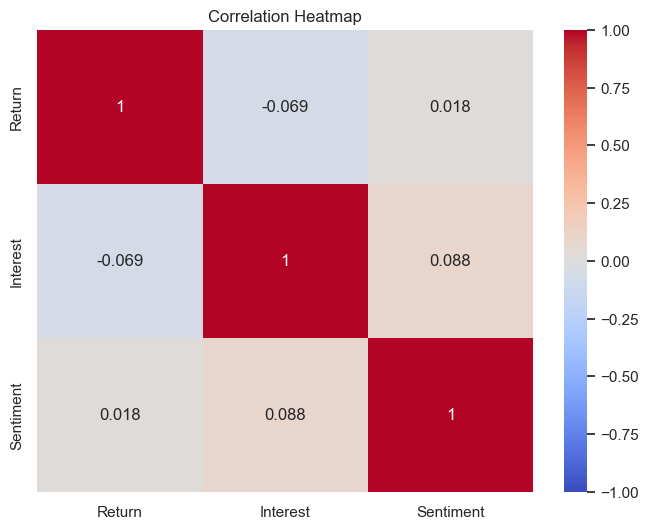

In [59]:
# Correlation heatmap

plt.figure(figsize=(8, 6))
sns.heatmap(df[['Return', 'Interest', 'Sentiment']].corr(), 
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

# plt.savefig("results/correlation_heatmap.png")

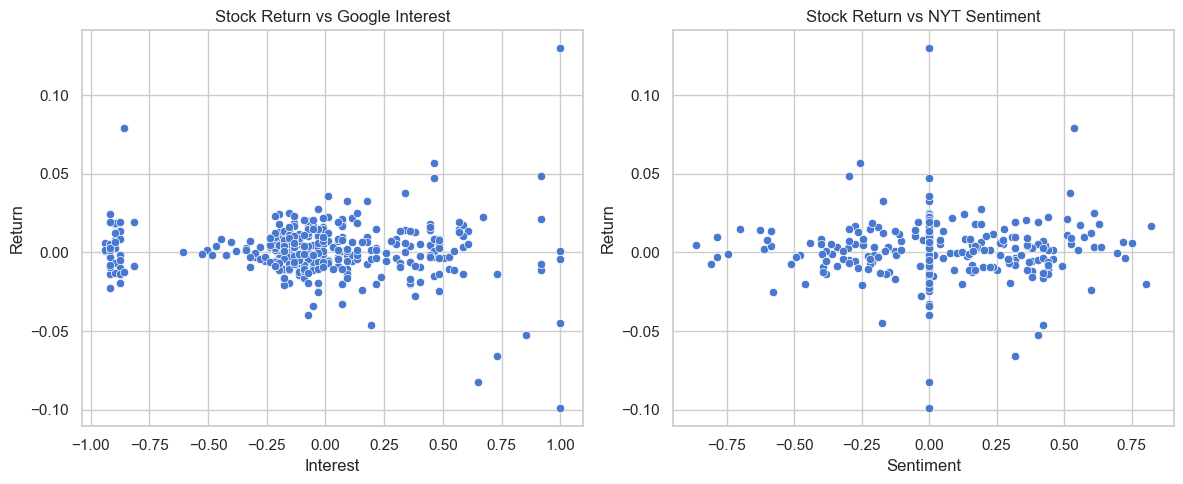

In [60]:
# Explore Interest and Sentiment Shapes

plt.figure(figsize=(12,5))

# Return vs Google Interest
plt.subplot(1,2,1)
sns.scatterplot(x='Interest', y='Return', data=df)
plt.title('Stock Return vs Google Interest')

# Return vs NYT Sentiment
plt.subplot(1,2,2)
sns.scatterplot(x='Sentiment', y='Return', data=df)
plt.title('Stock Return vs NYT Sentiment')

plt.tight_layout()
plt.show()

# plt.savefig("results/return_vs.png")

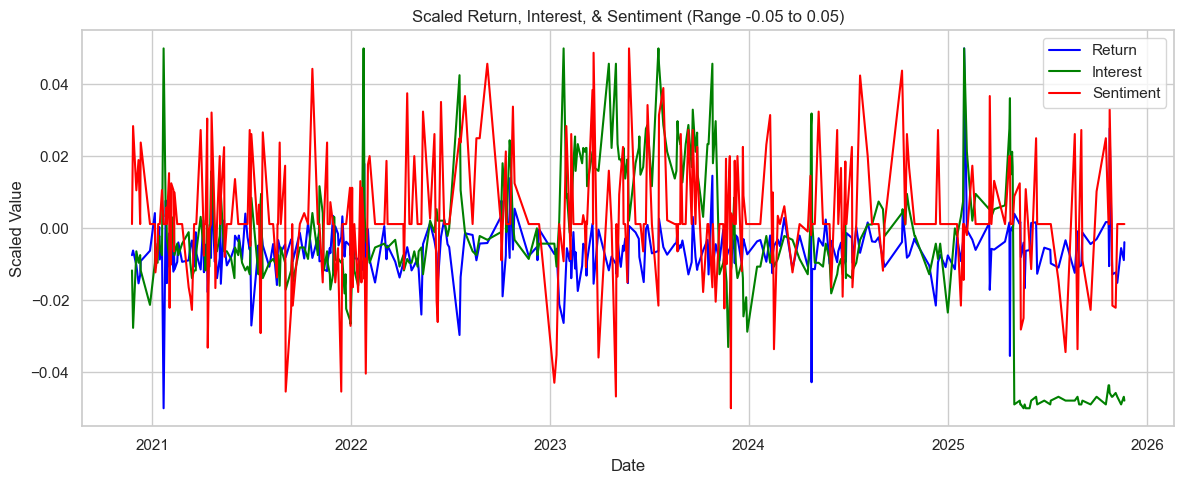

In [61]:
# Time Series

def scale_series(series, new_min=-0.05, new_max=0.05):
    s_min = series.min()
    s_max = series.max()
    return (series - s_min) / (s_max - s_min) * (new_max - new_min) + new_min

# Apply scaling to Return, Interest, Sentiment
df['Return_scaled'] = scale_series(df['Return'])
df['Interest_scaled'] = scale_series(df['Interest'])
df['Sentiment_scaled'] = scale_series(df['Sentiment'])

# Plot scaled series
plt.figure(figsize=(12,5))
plt.plot(df['Date'], df['Return_scaled'], label='Return', color='blue')
plt.plot(df['Date'], df['Interest_scaled'], label='Interest', color='green')
plt.plot(df['Date'], df['Sentiment_scaled'], label='Sentiment', color='red')
plt.title("Scaled Return, Interest, & Sentiment (Range -0.05 to 0.05)")
plt.xlabel("Date")
plt.ylabel("Scaled Value")
plt.legend()
plt.tight_layout()
plt.show()
# plt.savefig("results/time_series.png")


Feature Engineering


Modeling